## [Issue] Why RSSI has similar probability to be capture at different signal strength.ipynb

#### Hypothesis 1: when BLE advertisting, it advertising on 3 broadcasting channel evenly

Boardcast channel:
* 2402 MHz
* 2426 MHz
* 2480 MHz

Given Free Space Model:

$$P_\text{T(dBm)}-20\cdot\log_\text{10}(d)+10\cdot\log_\text{10}\left(k\cdot\frac{\lambda^2_c}{16\pi^2}\right)$$

$$\lambda=\frac{c}{f}$$

Assume $P_\text{T(dBm)}=0$, $k=1$

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
Frequency = np.array([2402*1e6,2426*1e6,2480*1e6])

In [8]:
def frequency_to_wavelength(f):
    c = 299792458 
    return 299792458 / f

In [12]:
def rx_power(d, wavelength, tx_power=0, k=1):
    return tx_power - 20 * np.log10(d) + 10 * np.log10(k*np.power(wavelength,2)/(16*np.pi*np.pi))

In [22]:
x = np.arange(0.1,35,0.1)
y0 = rx_power(d=x,wavelength=frequency_to_wavelength(Frequency[0]))
y1 = rx_power(d=x,wavelength=frequency_to_wavelength(Frequency[1]))
y2 = rx_power(d=x,wavelength=frequency_to_wavelength(Frequency[2]))

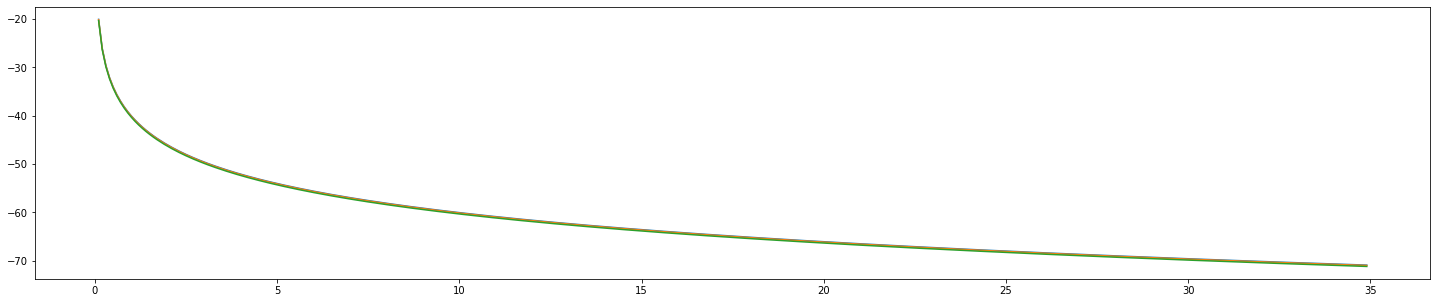

In [23]:
plt.figure(figsize=(25,5))
plt.plot(x,y0)
plt.plot(x,y1)
plt.plot(x,y2)